# ENEL 525-LAB 3-LMS Algorithm


In [26]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
import scipy
from scipy.stats import pearsonr
import pandas as pd
from PIL import Image
from prettytable import PrettyTable

### Function Defs

In [27]:
def mse(array):
    return np.mean(array.flatten()**2)

# PART 1

### Initialization and MSE iteration

In [28]:

# Input patterns
P = np.array([
    [1, 1],
    [1, 2],
    [2, -1],
    [2, 0],
    [-1, 2],
    [-2, 1],
    [-1, -1],
    [-2, -2]
]).T

# Target matrix based on classes
T = np.array([[-1, -1, -1, -1,  1,  1,  1,  1],[-1, -1,  1,  1, -1, -1,  1,  1]])

T_err = np.array([[-1, -1,  1,  1],[-1,  1, -1, 1,]])
# Initial parameters
W = np.array([[1, 0],[0, 1]])
b = np.array([[1],[1]])
et = 0.14
lr = 0.004
mse_e = []
error_table = np.zeros((4, 8))  # Initialize a 4x8 table
N = 8
i = 0


while True:
    input_err = np.zeros((2, N))
    for k in range(N):
        input_err[:, k] = T[:, k] - (np.dot(W,P[:,k])+b.T)
        #input_err[:, k] = (T[:, k].reshape(2,1) - (np.dot(W,P[:,k].reshape(2,1))+b)).reshape(1,2)
        #print("Old W: \n", W)
        #print("Old b: \n", b)
        W =  W + 2*lr*np.dot(input_err[:, k].reshape(2,1), P[:,k].reshape(1,2))
        b = b + 2 * lr * input_err[:, k].reshape(2,1)
    
    mse_current = mse(input_err)
    mse_e.append(mse_current)
    i += 1
    #print("Updated mse_e:\n",mse_e)
    #print("-----------------------------")


    if mse_current < et:
            break








### MSE PLOT PER ITERATION

Text(0.5, 1.0, 'Mean Squared Error Over Iterations')

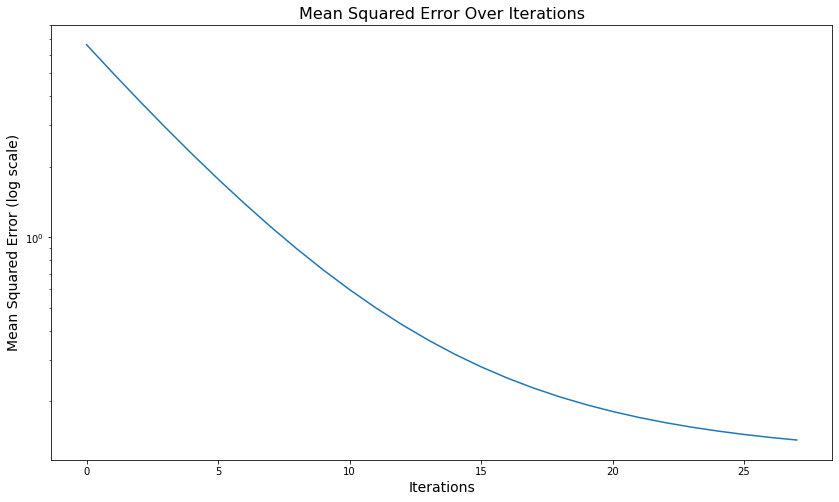

In [29]:
plt.figure(figsize=(14,8)) 
plt.semilogy(mse_e)
plt.xlabel('Iterations', fontsize=14) 
plt.ylabel('Mean Squared Error (log scale)', fontsize=14)
plt.title('Mean Squared Error Over Iterations', fontsize=16)

### MSE TABLE PER TARGET VECTOR

In [30]:
#4x8 table calculation
for r in range(4):   
    for c in range(N):
        error_table[r,c] = mse(T_err[:, r] - (np.dot(W, P[:,c]) + b.T))

df = pd.DataFrame(error_table, 
                  columns=['p1', 'p2', 'p3', 'p4', 'p5', 'p6', 'p7', 'p8'], 
                  index=['class 1', 'class 2', 'class 3', 'class 4'])

# Converting the dataframe to a pretty table:
pt = PrettyTable()

# Setting the field names (column headers)
pt.field_names = [""] + list(df.columns)

pt.field_names = [""] + list(df.columns)

# Formatting and adding rows from the dataframe
for row in df.iterrows():
    formatted_row = [f"{value:.2f}" for value in row[1]]
    pt.add_row([row[0]] + formatted_row)
    
column_widths = [10, 10, 10, 10, 10, 10, 10, 10, 10]

for idx, width in enumerate(column_widths):
    pt.align[pt.field_names[idx]] = "l"
    pt._max_width[pt.field_names[idx]] = width
    
from IPython.core.display import display, HTML

print(pt)


+---------+------+------+------+------+------+------+------+------+
|         | p1   | p2   | p3   | p4   | p5   | p6   | p7   | p8   |
+---------+------+------+------+------+------+------+------+------+
| class 1 | 0.44 | 0.10 | 2.47 | 1.25 | 1.23 | 2.50 | 3.19 | 5.54 |
| class 2 | 0.88 | 1.82 | 0.03 | 0.09 | 3.59 | 3.90 | 1.72 | 3.13 |
| class 3 | 1.39 | 1.24 | 4.17 | 3.14 | 0.11 | 0.07 | 1.51 | 2.56 |
| class 4 | 1.83 | 2.95 | 1.74 | 1.98 | 2.47 | 1.47 | 0.05 | 0.14 |
+---------+------+------+------+------+------+------+------+------+


# PART 2


### Initialization and Pre-Processing

In [31]:
ima=Image.open(r"C:\Users\patsh\Downloads\char_a.bmp")
ima = np.array(ima).astype(np.float64)
ima = ima.reshape(ima.size, 1)

imb=Image.open(r"C:\Users\patsh\Downloads\char_b.bmp")
imb = np.array(imb).astype(np.float64)
imb = imb.reshape(imb.size, 1)

imc=Image.open(r"C:\Users\patsh\Downloads\char_c.bmp")
imc = np.array(imc).astype(np.float64)
imc = imc.reshape(imc.size, 1)

imd=Image.open(r"C:\Users\patsh\Downloads\char_d.bmp")
imd = np.array(imd).astype(np.float64)
imd = imd.reshape(imd.size, 1)

ime=Image.open(r"C:\Users\patsh\Downloads\char_e.bmp")
ime = np.array(ime).astype(np.float64)
ime = ime.reshape(ime.size, 1)

imf=Image.open(r"C:\Users\patsh\Downloads\char_f.bmp")
imf = np.array(imf).astype(np.float64)
imf = imf.reshape(imf.size, 1)

img=Image.open(r"C:\Users\patsh\Downloads\char_g.bmp")
img = np.array(img).astype(np.float64)
img = img.reshape(img.size, 1)

imh=Image.open(r"C:\Users\patsh\Downloads\char_h.bmp")
imh = np.array(imh).astype(np.float64)
imh = imh.reshape(imh.size, 1)

imi=Image.open(r"C:\Users\patsh\Downloads\char_i.bmp")
imi = np.array(imi).astype(np.float64)
imi = imi.reshape(imi.size, 1)

imj=Image.open(r"C:\Users\patsh\Downloads\char_j.bmp")
imj = np.array(imj).astype(np.float64)
imj = imj.reshape(imj.size, 1)

imk=Image.open(r"C:\Users\patsh\Downloads\char_k.bmp")
imk = np.array(imk).astype(np.float64)
imk = imk.reshape(imk.size, 1)

iml=Image.open(r"C:\Users\patsh\Downloads\char_l.bmp")
iml = np.array(iml).astype(np.float64)
iml = iml.reshape(iml.size, 1)

imm=Image.open(r"C:\Users\patsh\Downloads\char_m.bmp")
imm = np.array(imm).astype(np.float64)
imm = imm.reshape(imm.size, 1)

imn=Image.open(r"C:\Users\patsh\Downloads\char_n.bmp")
imn = np.array(imn).astype(np.float64)
imn = imn.reshape(imn.size, 1)

imo=Image.open(r"C:\Users\patsh\Downloads\char_o.bmp")
imo = np.array(imo).astype(np.float64)
imo = imo.reshape(imo.size, 1)

imp=Image.open(r"C:\Users\patsh\Downloads\char_p.bmp")
imp = np.array(imp).astype(np.float64)
imp = imp.reshape(imp.size, 1)

imq=Image.open(r"C:\Users\patsh\Downloads\char_q.bmp")
imq = np.array(imq).astype(np.float64)
imq = imq.reshape(imq.size, 1)

imr=Image.open(r"C:\Users\patsh\Downloads\char_r.bmp")
imr = np.array(imr).astype(np.float64)
imr = imr.reshape(imr.size, 1)

ims=Image.open(r"C:\Users\patsh\Downloads\char_s.bmp")
ims = np.array(ims).astype(np.float64)
ims = ims.reshape(ims.size, 1)

imt=Image.open(r"C:\Users\patsh\Downloads\char_t.bmp")
imt = np.array(imt).astype(np.float64)
imt = imt.reshape(imt.size, 1)

imu=Image.open(r"C:\Users\patsh\Downloads\char_u.bmp")
imu = np.array(imu).astype(np.float64)
imu = imu.reshape(imu.size, 1)

imv=Image.open(r"C:\Users\patsh\Downloads\char_v.bmp")
imv = np.array(imv).astype(np.float64)
imv = imv.reshape(imv.size, 1)

imw=Image.open(r"C:\Users\patsh\Downloads\char_w.bmp")
imw = np.array(imw).astype(np.float64)
imw = imw.reshape(imw.size, 1)

imx=Image.open(r"C:\Users\patsh\Downloads\char_x.bmp")
imx = np.array(imx).astype(np.float64)
imx = imx.reshape(imx.size, 1)

imy=Image.open(r"C:\Users\patsh\Downloads\char_y.bmp")
imy = np.array(imy).astype(np.float64)
imy = imy.reshape(imy.size, 1)

imz=Image.open(r"C:\Users\patsh\Downloads\char_z.bmp")
imz = np.array(imz).astype(np.float64)
imz = imz.reshape(imz.size, 1)

imna= preprocessing.normalize(ima)
imnb = preprocessing.normalize(imb)
imnc = preprocessing.normalize(imc)
imnd = preprocessing.normalize(imd)
imne = preprocessing.normalize(ime)
imnf = preprocessing.normalize(imf)
imng = preprocessing.normalize(img)
imnh = preprocessing.normalize(imh)
imni = preprocessing.normalize(imi)
imnj = preprocessing.normalize(imj)
imnk = preprocessing.normalize(imk)
imnl = preprocessing.normalize(iml)
imnm = preprocessing.normalize(imm)
imnn = preprocessing.normalize(imn)
imno = preprocessing.normalize(imo)
imnp = preprocessing.normalize(imp)
imnq = preprocessing.normalize(imq)
imnr = preprocessing.normalize(imr)
imns = preprocessing.normalize(ims)
imnt = preprocessing.normalize(imt)
imnu = preprocessing.normalize(imu)
imnv = preprocessing.normalize(imv)
imnw = preprocessing.normalize(imw)
imnx = preprocessing.normalize(imx)
imny = preprocessing.normalize(imy)
imnz = preprocessing.normalize(imz)



### Initialization and MSE Iteration

In [32]:
P_orig= np.hstack((ima, imb, imc, imd, ime, imf, img, imh, imi, imj, imk, iml, imm, imn, imo, imp, imq, imr, ims, imt, imu, imv, imw, imx, imy, imz))
P = np.hstack((imna, imnb, imnc, imnd, imne, imnf, imng, imnh, imni, imnj, imnk, imnl, imnm, imnn, imno, imnp, imnq, imnr, imns, imnt, imnu, imnv, imnw, imnx, imny, imnz))
P = preprocessing.normalize(P)
T = P
image_size=ima.size

W = np.zeros((ima.size, ima.size))
b = np.zeros((ima.size, 1))

et = 10e-6
lr = 0.04
mse_e = []
N = 26
i = 0


while True:
    input_err = np.zeros((image_size, N))
    for k in range(N):
        input_err[:, k] = T[:, k] - (np.dot(W, P[:, k]) + b.T)
        #print("Old W: \n", W)
        #print("Old b: \n", b)
        W = W + 2 * lr * np.dot(input_err[:, k].reshape(image_size, 1), P[:, k].reshape(1, image_size))
        b = b + 2 * lr * input_err[:, k].reshape(image_size, 1)
    
    mse_current = mse(input_err)
    mse_e.append(mse_current)
    #print("Updated mse_e:\n", mse_e)
    #print("-----------------------------")

    if mse_current < et:
        break
W_final=W;
#print("W final: \n",W_final)

### MSE Plot Per Iteration

Text(0.5, 1.0, 'Mean Squared Error Over Iterations')

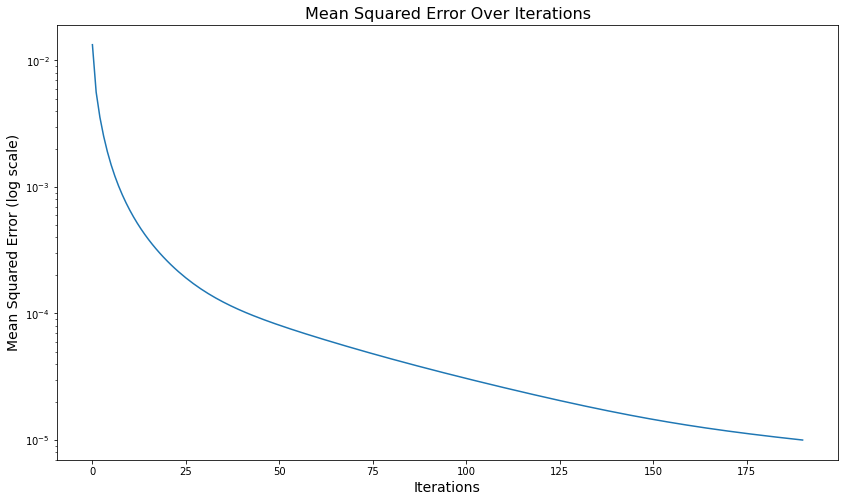

In [33]:
plt.figure(figsize=(14,8)) 
plt.semilogy(mse_e)
plt.xlabel('Iterations', fontsize=14) 
plt.ylabel('Mean Squared Error (log scale)', fontsize=14)
plt.title('Mean Squared Error Over Iterations', fontsize=16)

### Apply Trained Network to Letters

In [34]:
P_trained = np.zeros((image_size, N))
for k in range(N):
    P_trained [:, k]= np.dot(W_final, P[:, k]) + b.T

### Correlation Matrix

In [35]:
correlations = np.zeros((26, 26))
letters = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z']

for i in range(26):
    for j in range(26):
        correlations[i, j], _ = pearsonr(P_trained[:, i], T[:, j])

table = pd.DataFrame(correlations, columns=letters, index=letters)
print(table)

          a         b         c         d         e         f         g  \
a  0.999921 -0.048009  0.433167 -0.037136  0.544127 -0.238611 -0.138862   
b -0.045701  0.999655  0.050043  0.438003 -0.012189 -0.132527  0.206423   
c  0.431562  0.053476  0.996939 -0.032206  0.596372 -0.177479 -0.219785   
d -0.030666  0.441067 -0.028821  0.997143 -0.012103 -0.079379  0.376635   
e  0.539504 -0.003001  0.602176 -0.005045  0.993277 -0.186025 -0.118780   
f -0.225837 -0.119019 -0.159941 -0.063595 -0.175953  0.988394 -0.133818   
g -0.133724  0.210619 -0.206947  0.388395 -0.108343 -0.130327  0.992633   
h  0.140307  0.428304  0.042019  0.246523  0.018458 -0.140311  0.142629   
i -0.235345 -0.230971 -0.250027 -0.162031 -0.187869  0.375865 -0.069134   
j -0.214361 -0.199960 -0.225015 -0.120812 -0.171823  0.346949 -0.022456   
k  0.071419  0.283648  0.001051  0.046696  0.063843 -0.188676  0.079808   
l -0.176715 -0.232844 -0.182142 -0.173448 -0.141787  0.396430 -0.124443   
m -0.136754 -0.210646 -0.

### Display Images

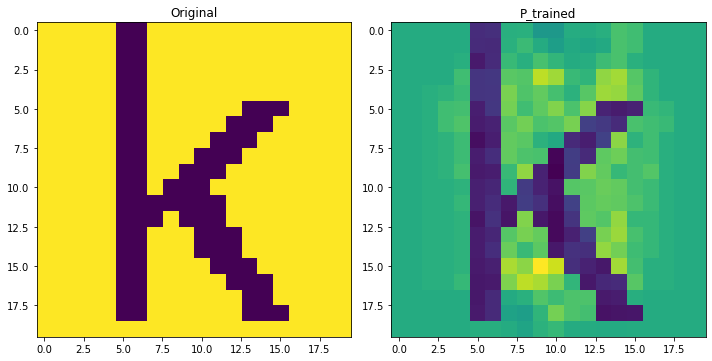

In [36]:
plt.figure(figsize=(10, 5))

# Displaying the reshaped imb
plt.subplot(1, 2, 1)
plt.imshow(np.reshape(imk, (20, 20)))
plt.title('Original')

# Displaying the reshaped P_orig[:1]
plt.subplot(1, 2, 2)
plt.imshow(np.reshape(P_trained[:,10], (20, 20)))
plt.title('P_trained')

plt.tight_layout()
plt.show()

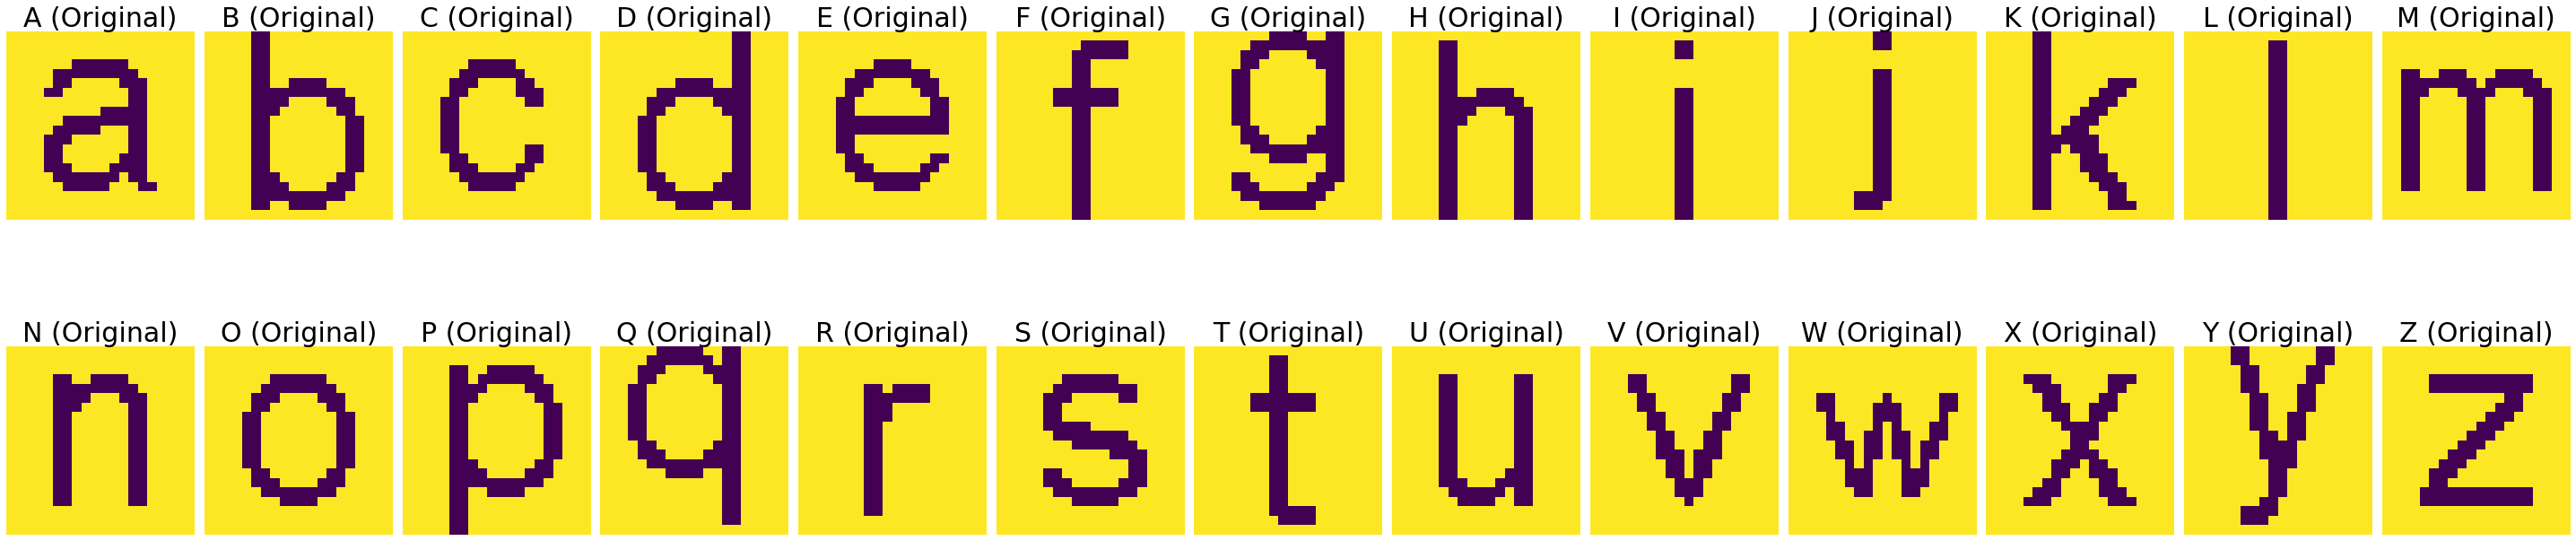

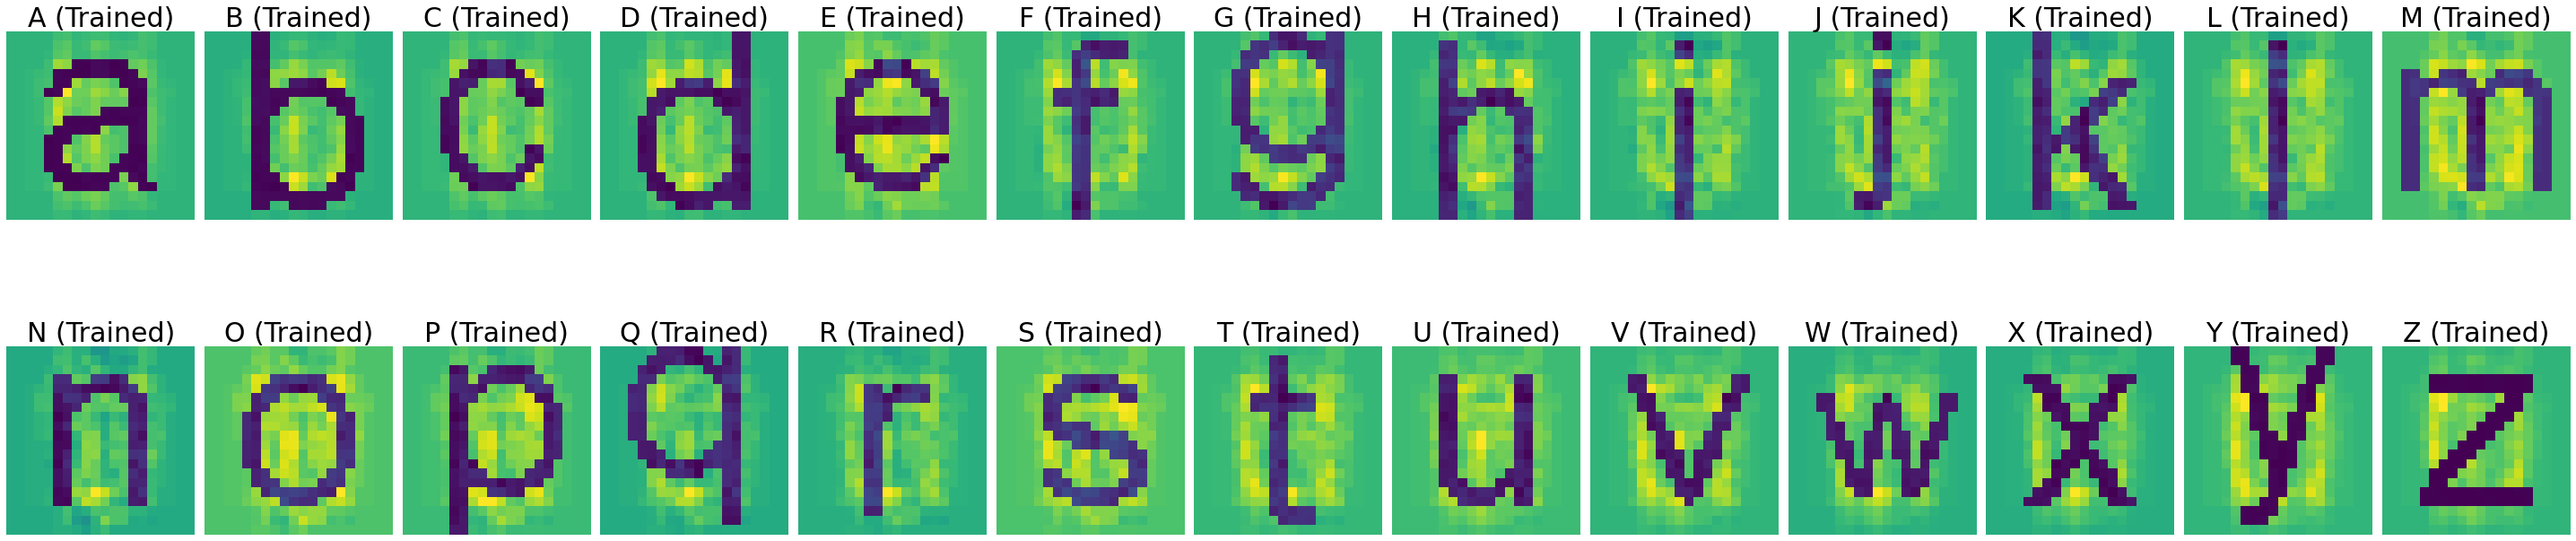

In [37]:
plt.figure(figsize=(40,12))

letters = list('abcdefghijklmnopqrstuvwxyz')
N = len(letters)

for i in range(N):
    plt.subplot(2, 13, i+1)
    plt.imshow(np.reshape(P_orig[:,i], (20, 20)))
    plt.title(letters[i].upper() + " (Original)", fontsize=30)
    plt.axis('off')  # Hide axis values

plt.subplots_adjust(hspace=0)  # Adjusting the horizontal space between rows
plt.tight_layout()
plt.show()

plt.figure(figsize=(40,12))

letters = list('abcdefghijklmnopqrstuvwxyz')
N = len(letters)

for i in range(N):
    plt.subplot(2, 13, i+1)
    plt.imshow(np.reshape(P_trained[:,i], (20, 20)))
    plt.title(letters[i].upper() + " (Trained)", fontsize=30)
    plt.axis('off')  # Hide axis values

plt.subplots_adjust(hspace=0)  # Adjusting the horizontal space between rows
plt.tight_layout()
plt.show()
